In [145]:
from itertools import combinations
from Bio import Phylo
from ete3 import Tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from io import StringIO
import ete3
from copy import deepcopy

In [91]:
from collections import Counter

In [270]:
def shared_progenitor_scores(t_list, sps_mat):
    p_score = 1/(2**len(t_list)-1)
    for pair in combinations(t_list, 2):
        pair = [pair[0],pair[1]]
        pair.sort()
        pair = (pair[0], pair[1])
        if pair not in sps_mat:
            sps_mat[pair] = 0
        sps_mat[pair] += p_score
    return sps_mat

def downsampling(tree, metadata, max_num=None):
    overlap_cells = np.array(list(set(metadata.index).intersection(set([i.name for i in tree.get_terminals()]))))
    tree_trim = deepcopy(tree)
    # tree_cells = np.array([i.name for i in tree.get_terminals()])
    cnt = Counter(metadata.loc[overlap_cells][1])
    if max_num is None:
        max_num = cnt.most_common()[-1][-1]
    sample_index = np.array([])
    states = set(metadata.loc[overlap_cells][1])
    for i in states:
        index = overlap_cells[(metadata.loc[overlap_cells] == i).to_numpy().flatten()]
        sample_index = np.concatenate((sample_index, np.random.choice(index, min(max_num, cnt[i]), replace=False)))
    keep_nodes = set()
    for i in tree_trim.get_terminals():
        if i.name in sample_index:
            for j in tree_trim.get_path(i):
                keep_nodes.add(j)
    for i in tree_trim.get_nonterminals():
        for j in i.clades:
            if not j in keep_nodes:
                i.clades.remove(j)

    return tree_trim

def generate_sps_mat(sps_mat):
    celltypes = list(set(sum([[i[0],i[1]] for i in sps_mat.keys()], [])))
    df = pd.DataFrame(index = celltypes, columns=celltypes)
    for i in sps_mat.keys():
        df[i[0]][i[1]] = sps_mat[i]
        df[i[1]][i[0]] = sps_mat[i]
    df = 1-df/np.max(df)
    
    return df.astype(float)

In [285]:
tree = Phylo.read('../data/embory/embryo_mtSNV_final_nofilter.phy_nj.nwk', 'newick')
metadata = pd.read_csv('../data/embory/tree_color.txt', sep=' ', header=None, index_col=0)
tree_trim = downsampling(tree, metadata)
sps_mat = dict()
for node in Phylo.BaseTree._preorder_traverse(tree_trim.root, lambda elem: elem.clades):
    if len(node.clades) == 0:
        continue
    t_list = [metadata.loc[i.name][1] for i in node.get_terminals()]
    sps_mat = shared_progenitor_scores(t_list, sps_mat)
df = generate_sps_mat(sps_mat)
Z = linkage(df, 'ward')

/home/wangkun/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


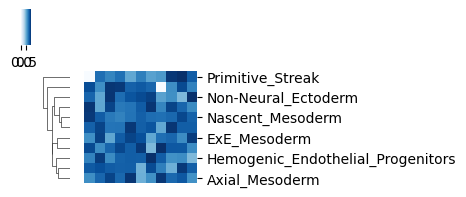

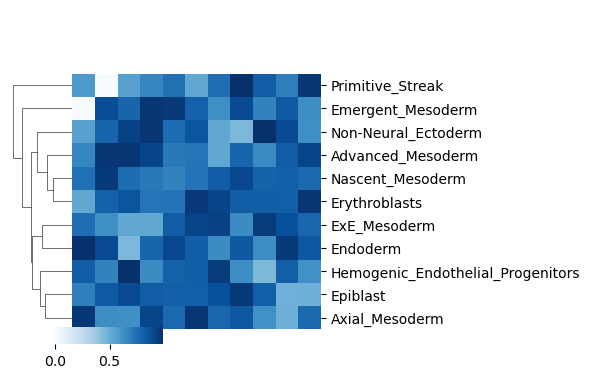

In [287]:
clustergrid = sns.clustermap(df, method="average", cmap="Blues", row_linkage=Z, col_cluster=False, figsize=(2,2),xticklabels=False, cbar_kws={"orientation": "horizontal"})
clustergrid = sns.clustermap(df[df.columns[clustergrid.dendrogram_row.reordered_ind]], 
                             method="average", figsize=(6,3.5), cmap="Blues", row_linkage=Z, 
                             col_cluster=False, cbar_pos=(0.1, 0, 0.18, 0.05),xticklabels=False,
                             cbar_kws={"orientation": "horizontal"})

In [276]:
tree = Phylo.read('../data/YFL_mtSNV_final.phy_nj.nwk', 'newick')
metadata = pd.read_csv('../data/YFL_tree_color.txt', sep=' ', header=None, index_col=0)
tree_trim = downsampling(tree, metadata)
sps_mat = dict()
for node in Phylo.BaseTree._preorder_traverse(tree_trim.root, lambda elem: elem.clades):
    if len(node.clades) == 0:
        continue
    t_list = [metadata.loc[i.name][1] for i in node.get_terminals()]
    sps_mat = shared_progenitor_scores(t_list, sps_mat)
df = generate_sps_mat(sps_mat)
Z = linkage(df, 'ward')

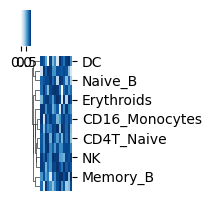

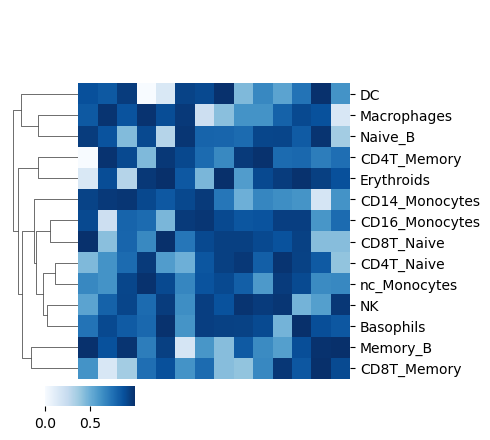

In [284]:
clustergrid = sns.clustermap(df, method="average", cmap="Blues", row_linkage=Z, col_cluster=False, figsize=(2,2),xticklabels=False, cbar_kws={"orientation": "horizontal"})
clustergrid = sns.clustermap(df[df.columns[clustergrid.dendrogram_row.reordered_ind]], 
                             method="average", figsize=(5,4), cmap="Blues", row_linkage=Z, 
                             col_cluster=False, cbar_pos=(0.1, -0.03, 0.18, 0.05),xticklabels=False,
                             cbar_kws={"orientation": "horizontal"})

In [288]:
tree = Phylo.read('../data/THQ_mtSNV_final.phy_nj.nwk', 'newick')
metadata = pd.read_csv('../data/THQ_tree_color.txt', sep=' ', header=None, index_col=0)
tree_trim = downsampling(tree, metadata)
sps_mat = dict()
for node in Phylo.BaseTree._preorder_traverse(tree_trim.root, lambda elem: elem.clades):
    if len(node.clades) == 0:
        continue
    t_list = [metadata.loc[i.name][1] for i in node.get_terminals()]
    sps_mat = shared_progenitor_scores(t_list, sps_mat)
df = generate_sps_mat(sps_mat)
Z = linkage(df, 'ward')

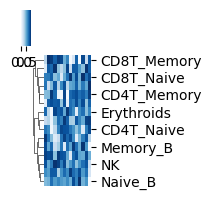

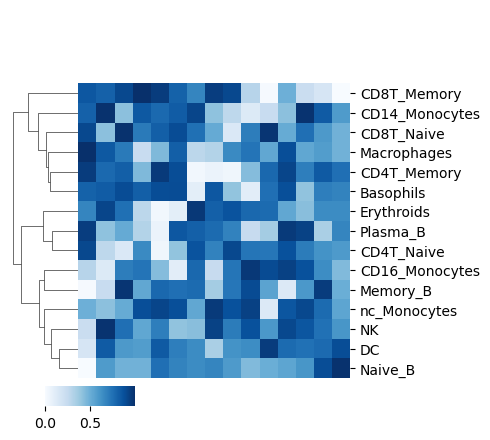

In [289]:
clustergrid = sns.clustermap(df, method="average", cmap="Blues", row_linkage=Z, col_cluster=False, figsize=(2,2),xticklabels=False, cbar_kws={"orientation": "horizontal"})
clustergrid = sns.clustermap(df[df.columns[clustergrid.dendrogram_row.reordered_ind]], 
                             method="average", figsize=(5,4), cmap="Blues", row_linkage=Z, 
                             col_cluster=False, cbar_pos=(0.1, -0.03, 0.18, 0.05),xticklabels=False,
                             cbar_kws={"orientation": "horizontal"})